<a href="https://www.kaggle.com/code/ergunenesyazirlioglu/melbourne-housing-machine-learning-84?scriptVersionId=250820160" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/melbourne-housing-snapshot/melb_data.csv')

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
df['Car']          = df['Car'].fillna(0.0)
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['YearBuilt']    = df['YearBuilt'].fillna(1970.0)

In [9]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

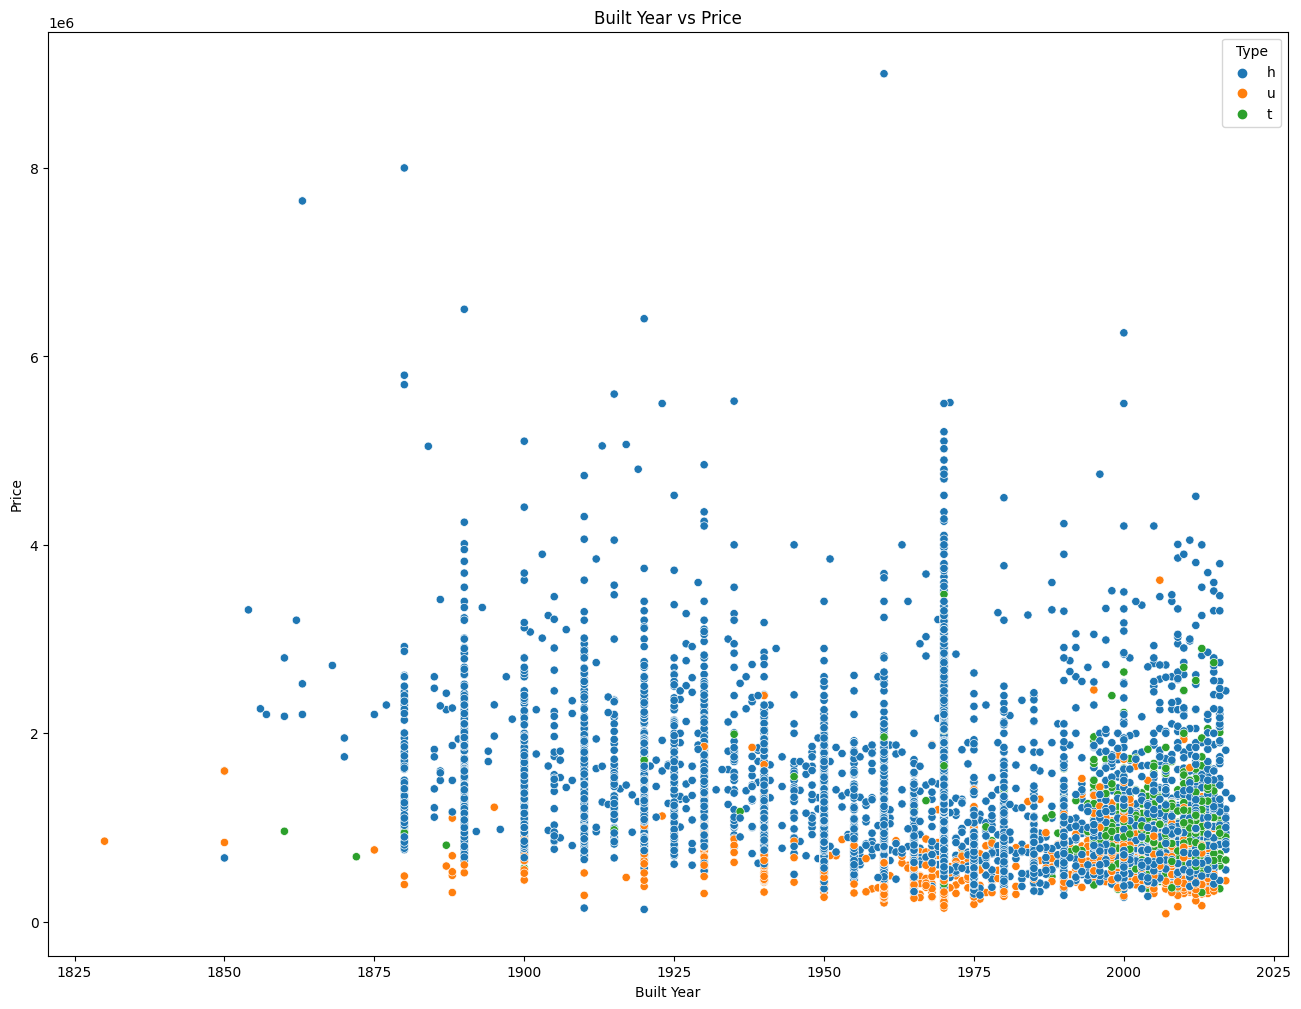

In [11]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x='YearBuilt', y='Price', data=df[df['YearBuilt'] > 1196.0], hue='Type')
plt.title('Built Year vs Price')
plt.xlabel('Built Year')
plt.ylabel('Price')
plt.legend(title='Type')
plt.show()

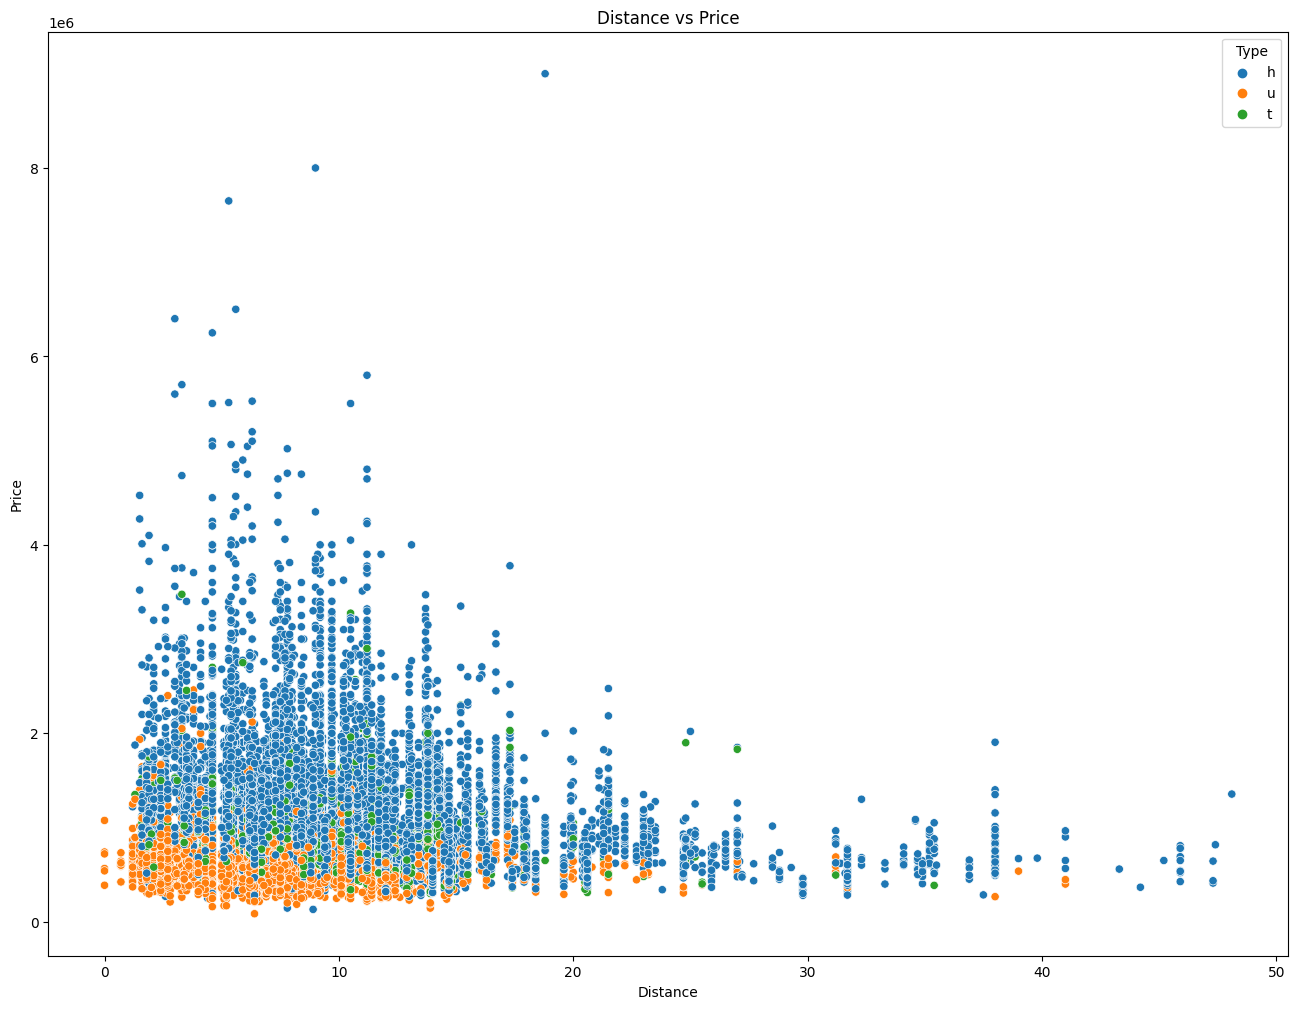

In [12]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x='Distance', y='Price', data=df, hue='Type')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.legend(title='Type')
plt.show()

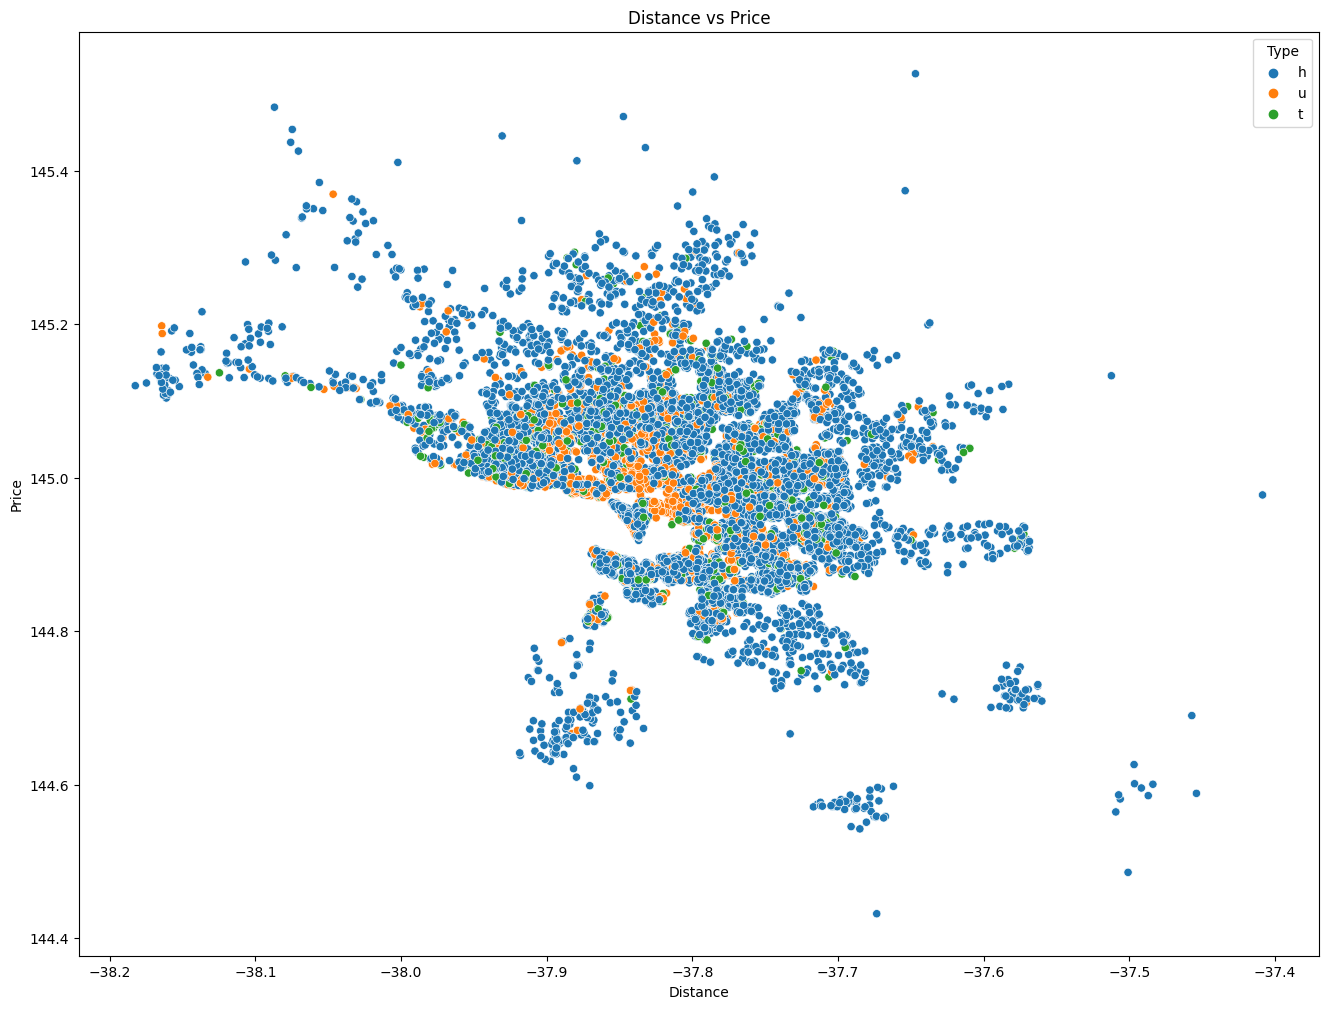

In [13]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x='Lattitude', y='Longtitude', data=df, hue='Type')
plt.title('Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.legend(title='Type')
plt.show()

Type
h    1.242665e+06
t    9.337351e+05
u    6.051275e+05
Name: Price, dtype: float64


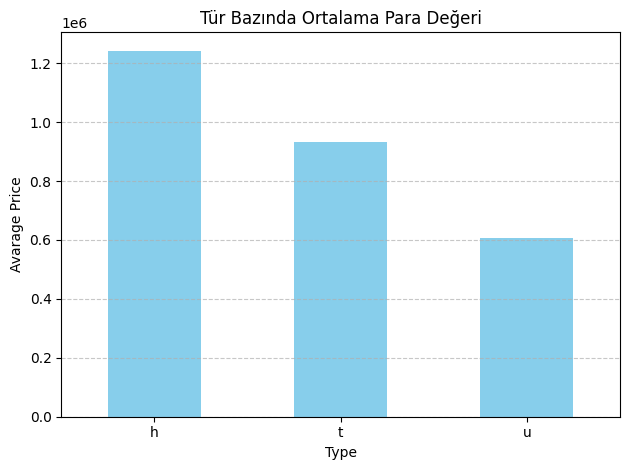

In [14]:
avarage_price = df.groupby('Type')['Price'].mean()

print(avarage_price)

avarage_price.plot(kind='bar', color='skyblue')
plt.title('Tür Bazında Ortalama Para Değeri')
plt.xlabel('Type')
plt.ylabel('Avarage Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
type = {'h': 2, 't': 1, 'u' : 0}

df['Type_Coded'] = df['Type'].map(type)

df.drop(columns=["Type"], inplace=True)
df.drop(columns=["Method"], inplace=True)
df.drop(columns=["Suburb"], inplace=True)
df.drop(columns=["Address"], inplace=True)
df.drop(columns=["SellerG"], inplace=True)
df.drop(columns=["CouncilArea"], inplace=True)
df.drop(columns=["Regionname"], inplace=True)

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=["Date"], inplace=True)
df

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0          2  1480000.0       2.5    3067.0       2.0       1.0  1.0   
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
3          3   850000.0       2.5    3067.0       3.0       2.0  1.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
13575      4  1245000.0      16.7    3150.0       4.0       2.0  2.0   
13576      3  1031000.0       6.8    3016.0       3.0       2.0  2.0   
13577      3  1170000.0       6.8    3016.0       3.0       2.0  4.0   
13578      4  2500000.0       6.8    3016.0       4.0       1.0  5.0   
13579      4  1285000.0       6.3    3013.0       4.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
0         202.0     151.96765     1970.0  -37.79960   144.99840   
1         156.0      79.00000     1900.0  -37.80790   144.99340   
2         134.0     150.00000     1900.0  -37.80930   144.99440   
3          94.0     151.96765     1970.0  -37.79690   144.99690   
4         120.0     142.00000     2014.0  -37.80720   144.99410   
...         ...           ...        ...        ...         ...   
13575     652.0     151.96765     1981.0  -37.90562   145.16761   
13576     333.0     133.00000     1995.0  -37.85927   144.87904   
13577     436.0     151.96765     1997.0  -37.85274   144.88738   
13578     866.0     157.00000     1920.0  -37.85908   144.89299   
13579     362.0     112.00000     1920.0  -37.81188   144.88449   

       Propertycount  Type_Coded  Day  Month  Year  
0             4019.0           2    3     12  2016  
1             4019.0           2    4      2  2016  
2             4019.0           2    4      3  2017  
3             4019.0           2    4      3  2017  
4             4019.0           2    4      6  2016  
...              ...         ...  ...    ...   ...  
13575         7392.0           2   26      8  2017  
13576         6380.0           2   26      8  2017  
13577         6380.0           2   26      8  2017  
13578         6380.0           2   26      8  2017  
13579         6543.0           2   26      8  2017  

[13580 rows x 17 columns]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

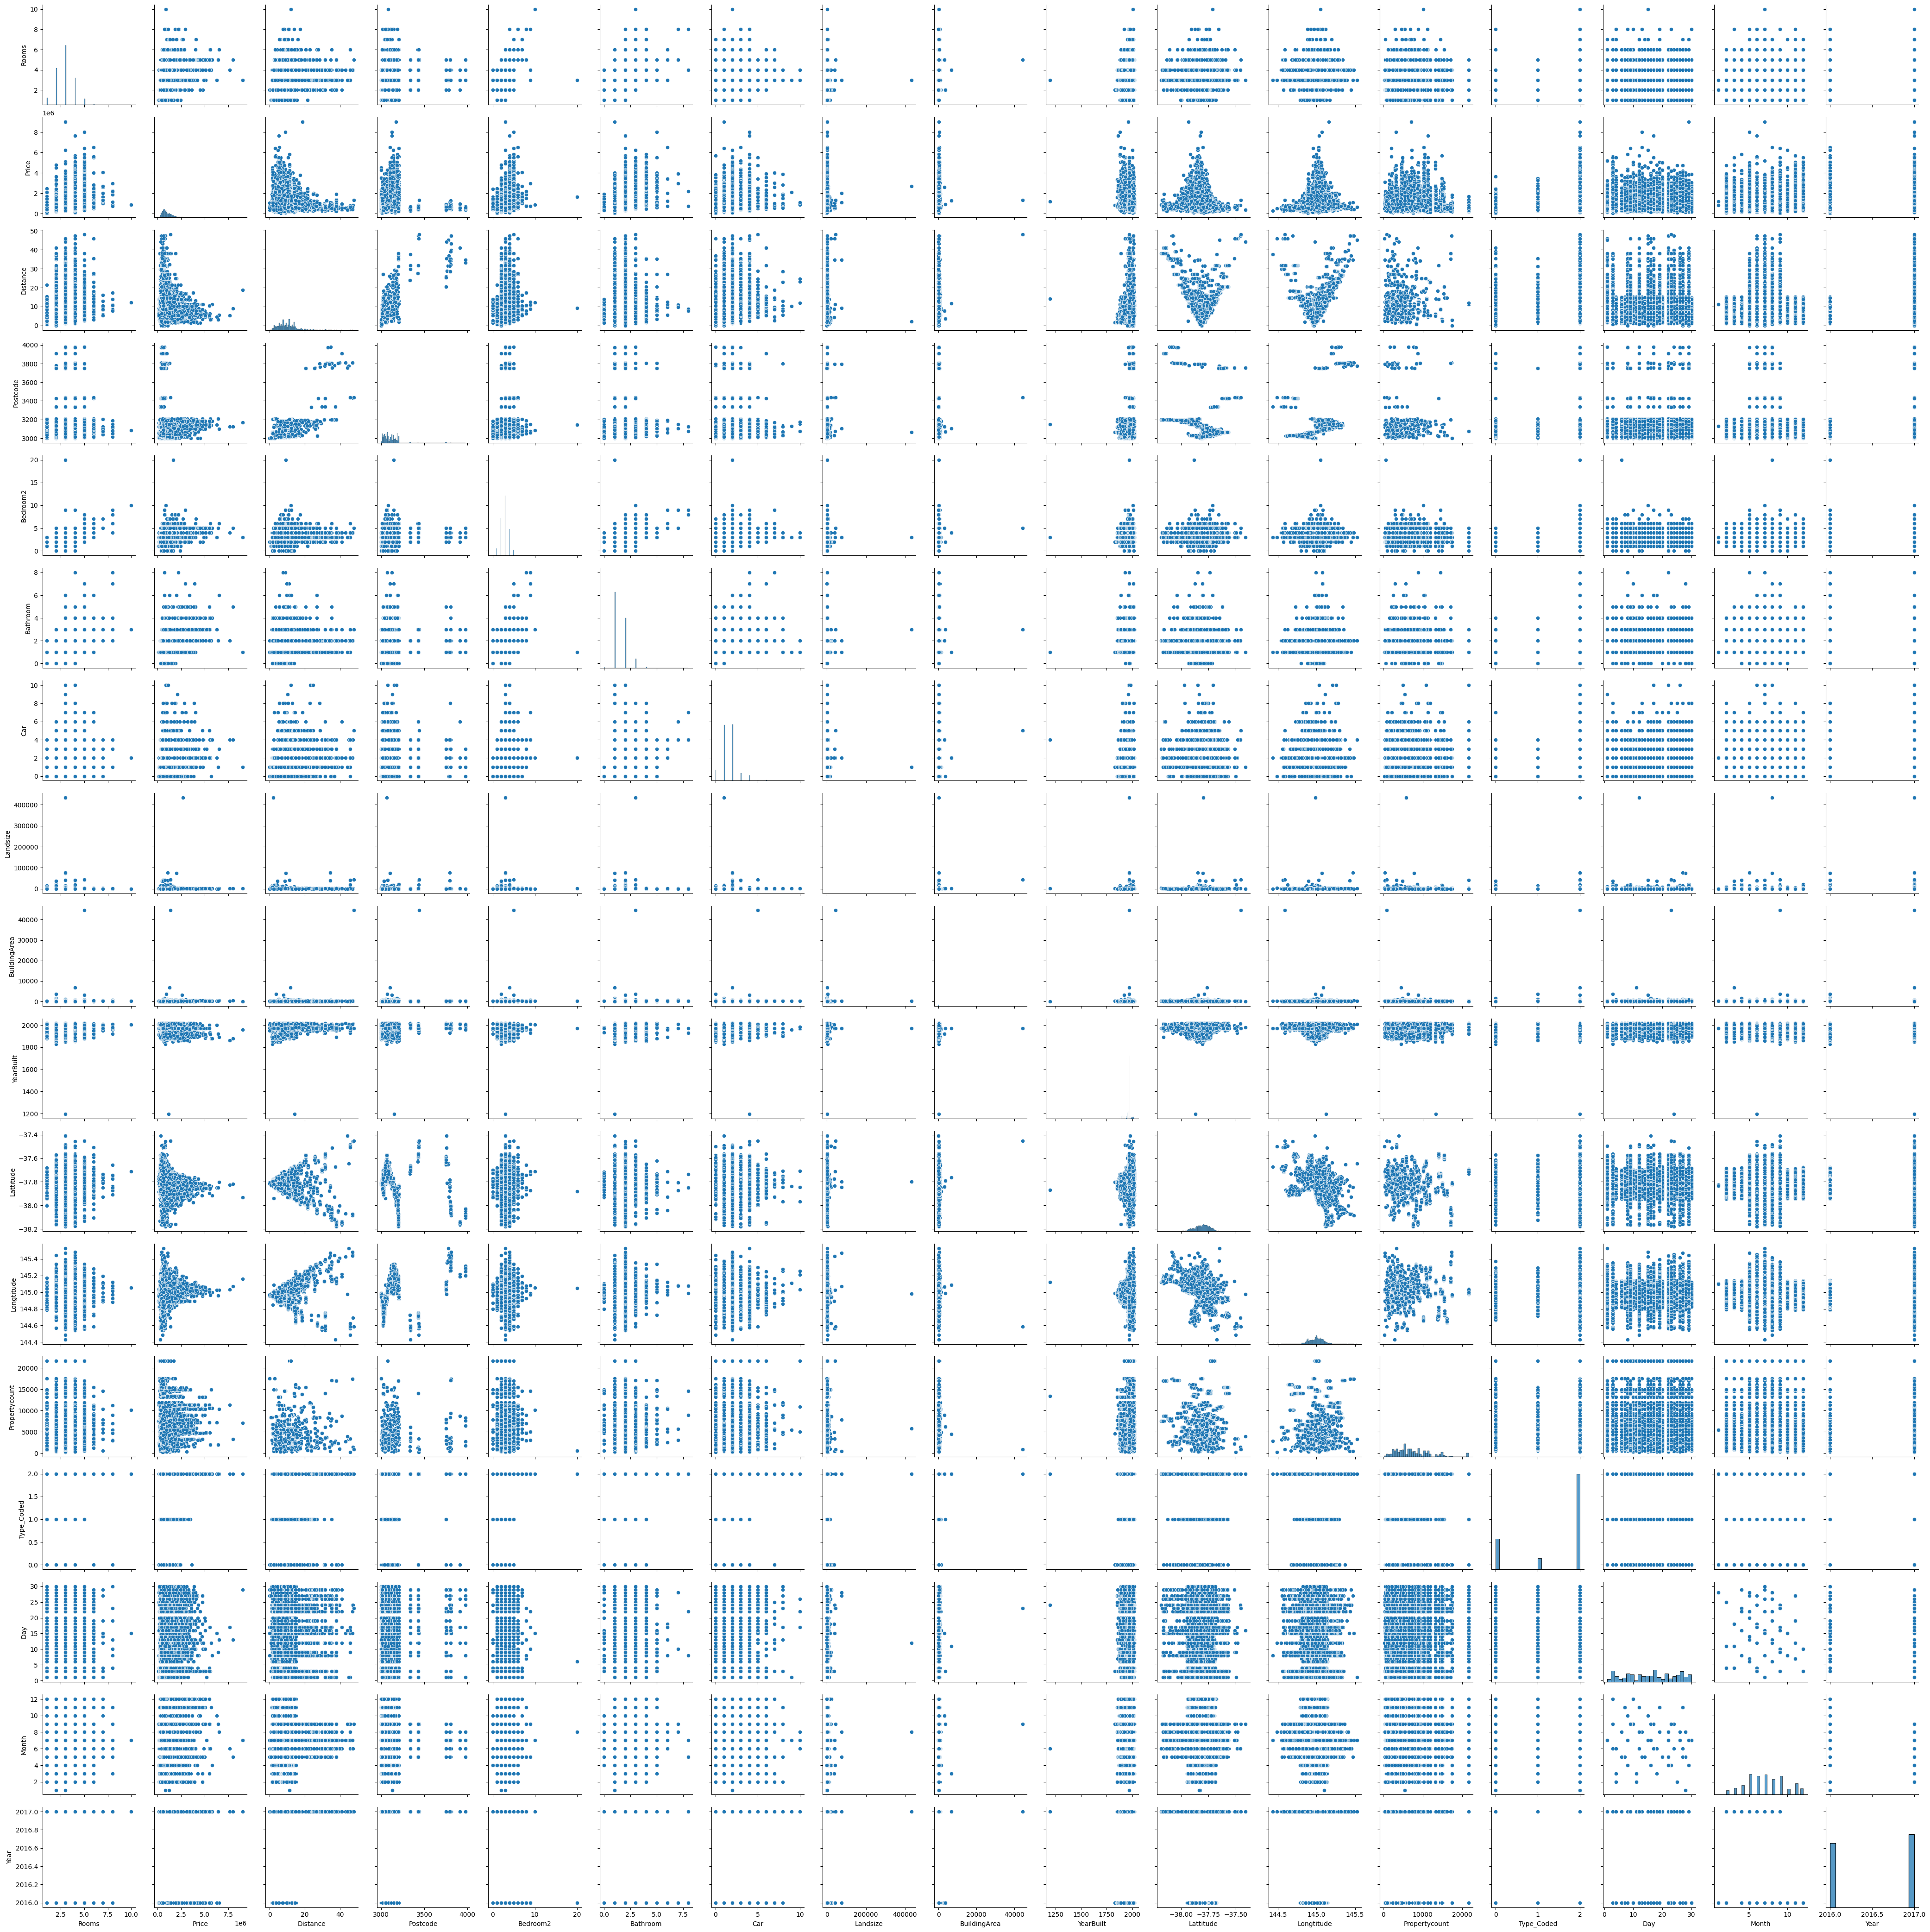

In [17]:
sns.pairplot(df)

                  Rooms     Price  Distance  Postcode  Bedroom2  Bathroom  \
Rooms          1.000000  0.496634  0.294203  0.055303  0.944190  0.592934   
Price          0.496634  1.000000 -0.162522  0.107867  0.475951  0.467038   
Distance       0.294203 -0.162522  1.000000  0.431514  0.295927  0.127155   
Postcode       0.055303  0.107867  0.431514  1.000000  0.060584  0.113664   
Bedroom2       0.944190  0.475951  0.295927  0.060584  1.000000  0.584685   
Bathroom       0.592934  0.467038  0.127155  0.113664  0.584685  1.000000   
Car            0.408364  0.234825  0.266082  0.048520  0.405046  0.322434   
Landsize       0.025678  0.037507  0.025004  0.024558  0.025646  0.037130   
BuildingArea   0.091373  0.069570  0.073990  0.040714  0.089102  0.084462   
YearBuilt     -0.051562 -0.259387  0.194815  0.025400 -0.041331  0.113957   
Lattitude      0.015948 -0.212934 -0.130723 -0.406104  0.015925 -0.070594   
Longtitude     0.100771  0.203656  0.239425  0.445357  0.102238  0.118971   

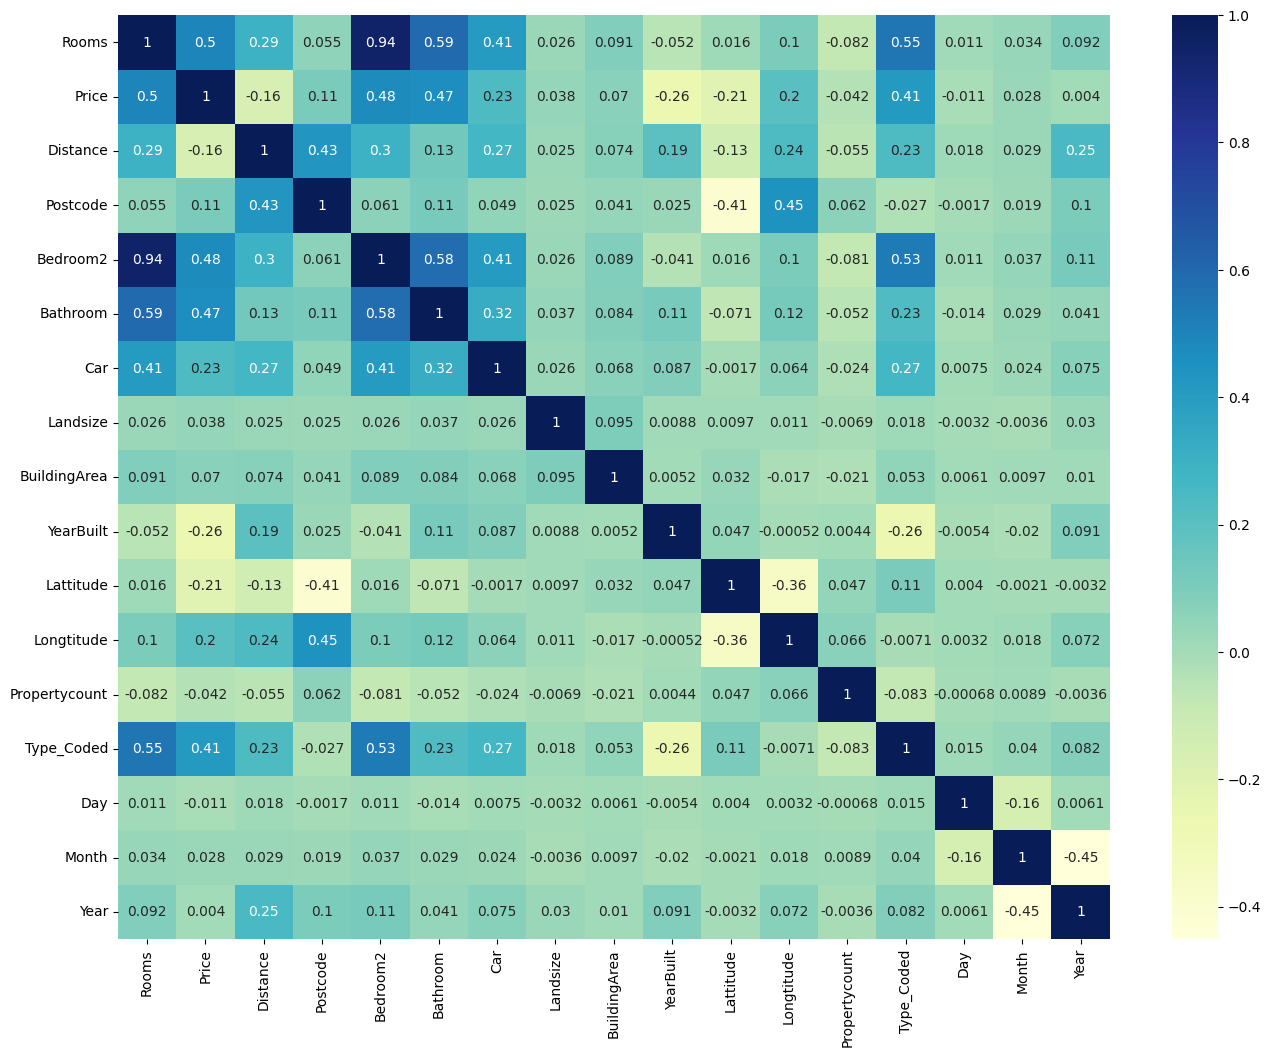

In [18]:
plt.figure(figsize=(16, 12))
co_mtx = df.corr(numeric_only=True)
print(co_mtx)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

In [19]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [20]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth =7)

In [22]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

MAE: 152234.11
R^2 Score: 0.84


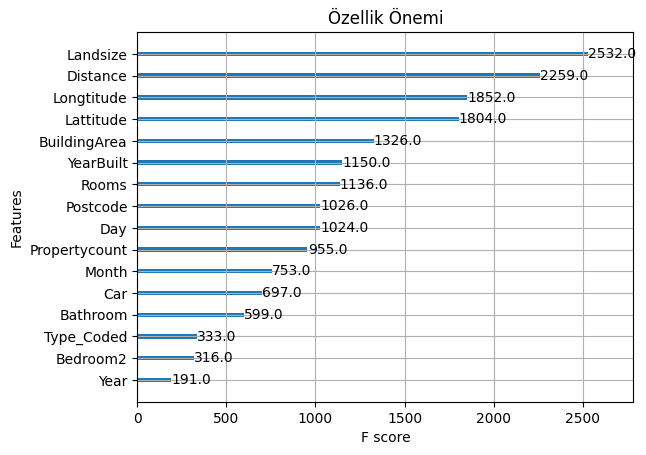

In [25]:
xgb.plot_importance(model)
plt.title("Özellik Önemi")
plt.show()